In [ ]:
# pip install opencv-python

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import mnist,fashion_mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape) # 60000 images with 28*28 as (height and width)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


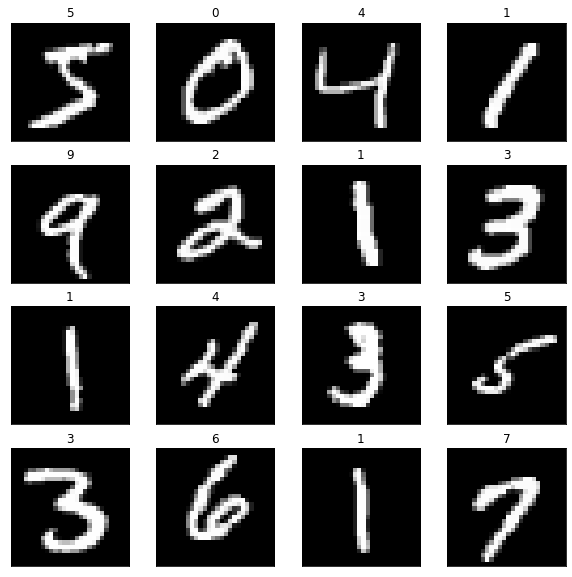

In [4]:
plt.figure(figsize=(10,10))
for i in range(16):  # i=0,1,2,...,15
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],'gray')
    plt.title(y_train[i])
plt.show()

In [5]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


In [6]:
print(list(set(y_train)))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [7]:
print(x_train[7].shape)
print(x_train[7])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 1

In [8]:
x_train = x_train[:5000,:,:]
x_test = x_test[:1000,:,:]
y_train = y_train[:5000]
y_test = y_test[:1000]
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28)
(1000, 28, 28)
(5000,)
(1000,)


In [9]:
# Normalize
x_train = x_train/255
x_test = x_test/255

# Reshape
x_train = x_train.reshape(5000, 28, 28,1)
x_test = x_test.reshape(1000, 28, 28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5000, 28, 28, 1)
(1000, 28, 28, 1)
(5000,)
(1000,)


### Build CNN Architecture

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [11]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28, 28, 1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',
          metrics=['accuracy'])

2022-10-03 22:26:45.275561: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-03 22:26:45.276617: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [12]:
m1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [13]:
h1 = m1.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=12)

Train on 5000 samples, validate on 1000 samples
Epoch 1/12
5000/5000 [==============================] - 21s 4ms/sample - loss: 0.7809 - accuracy: 0.7642 - val_loss: 0.2829 - val_accuracy: 0.9130
Epoch 2/12
5000/5000 [==============================] - 19s 4ms/sample - loss: 0.2004 - accuracy: 0.9420 - val_loss: 0.1697 - val_accuracy: 0.9460
Epoch 3/12
5000/5000 [==============================] - 19s 4ms/sample - loss: 0.1255 - accuracy: 0.9624 - val_loss: 0.1679 - val_accuracy: 0.9470
Epoch 4/12
5000/5000 [==============================] - 25s 5ms/sample - loss: 0.1009 - accuracy: 0.9710 - val_loss: 0.0950 - val_accuracy: 0.9690
Epoch 5/12
5000/5000 [==============================] - 27s 5ms/sample - loss: 0.0679 - accuracy: 0.9786 - val_loss: 0.1101 - val_accuracy: 0.9600
Epoch 6/12
5000/5000 [==============================] - 25s 5ms/sample - loss: 0.0592 - accuracy: 0.9830 - val_loss: 0.1062 - val_accuracy: 0.9670
Epoch 7/12
5000/5000 [==============================] - 26s 5ms/sample

In [14]:
r1 = pd.DataFrame(h1.history)
r1['Epochs'] = h1.epoch
r1.tail()

,loss,accuracy,val_loss,val_accuracy,Epochs
7,0.035630,0.9904,0.093859,0.973,7
8,0.030480,0.9918,0.086728,0.968,8
9,0.025158,0.9920,0.150681,0.963,9
10,0.021763,0.9936,0.085338,0.974,10
11,0.015057,0.9960,0.096527,0.969,11


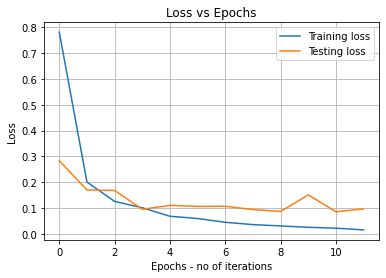

In [15]:
plt.plot(r1['Epochs'],r1['loss'],label='Training loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='Testing loss')
plt.title('Loss vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

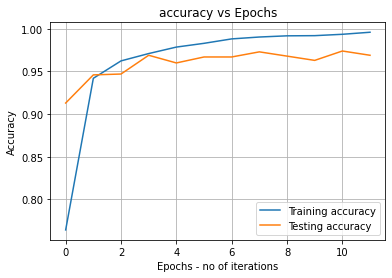

In [16]:
plt.plot(r1['Epochs'],r1['accuracy'],label='Training accuracy')
plt.plot(r1['Epochs'],r1['val_accuracy'],label='Testing accuracy')
plt.title('accuracy vs Epochs')
plt.xlabel('Epochs - no of iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [17]:
print(x_test.shape)

(1000, 28, 28, 1)


In [18]:
ypred = m1.predict(x_test)
print(ypred)

[[2.09856113e-12 1.81260805e-11 2.64049643e-10 ... 1.00000000e+00
  6.17395539e-14 1.69825317e-11]
 [9.09458176e-05 1.12588936e-02 9.88637269e-01 ... 1.76629766e-10
  1.37337292e-06 5.60009070e-13]
 [8.43394830e-08 9.99993086e-01 3.99684268e-08 ... 8.07815638e-07
  2.60324651e-08 5.95343774e-10]
 ...
 [1.00000000e+00 4.12156813e-14 3.53397108e-13 ... 7.36235744e-16
  1.15432227e-13 7.89117036e-12]
 [5.34345418e-05 1.08626075e-04 5.01649978e-04 ... 4.24584914e-06
  9.99330997e-01 4.70607347e-07]
 [3.21827360e-06 1.76291110e-07 1.19987180e-06 ... 1.87270809e-02
  2.67643976e-04 9.53790128e-01]]


In [19]:
print(ypred[7])

[1.2502782e-07 1.2737255e-05 1.7923225e-06 4.9926161e-06 3.8361343e-04
 1.8828924e-04 1.6910667e-10 6.0926806e-07 7.4706812e-05 9.9933320e-01]


In [20]:
print(ypred.shape)

(1000, 10)


In [21]:
print(sum(ypred[50]))
print(sum(ypred[689]))
print(sum(ypred[128]))

1.0000000223062107
0.9999999769926027
1.0000000052053408


In [22]:
ypred_m1 = [np.argmax(i) for i in ypred]
print(ypred_m1)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 8, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 5, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 7, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 4, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 7, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 8, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 4, 1, 0, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 8, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
cm = confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))

[[ 84   0   0   0   0   1   0   0   0   0]
 [  0 126   0   0   0   0   0   0   0   0]
 [  0   1 110   0   0   0   1   3   1   0]
 [  0   0   0 105   0   1   0   0   1   0]
 [  0   0   0   0 108   0   1   0   0   1]
 [  0   0   0   0   0  86   0   0   1   0]
 [  2   0   0   0   0   0  85   0   0   0]
 [  0   0   0   0   0   0   0  99   0   0]
 [  3   0   0   1   0   0   0   1  83   1]
 [  0   0   0   0   4   1   0   2   4  83]]
              precision    recall  f1-score   support

           0       0.94      0.99      0.97        85
           1       0.99      1.00      1.00       126
           2       1.00      0.95      0.97       116
           3       0.99      0.98      0.99       107
           4       0.96      0.98      0.97       110
           5       0.97      0.99      0.98        87
           6       0.98      0.98      0.98        87
           7       0.94      1.00      0.97        99
           8       0.92      0.93      0.93        89
           9       0.98     

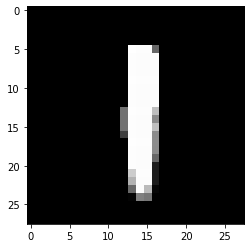

In [25]:
plt.imshow(x_test[345],'gray')
plt.show()

In [26]:
print(x_test.shape)
print(x_test[345].shape)

test_img = x_test[345].reshape(1,28,28,1)
print(test_img.shape)

(1000, 28, 28, 1)
(28, 28, 1)
(1, 28, 28, 1)


In [27]:
res  = m1.predict(x_test[[689]])
print(res)
res_predict = np.argmax(res[0])
res_predict

[[2.8523407e-05 5.4431809e-03 3.5711598e-06 1.8558800e-06 1.8227999e-01
  2.2363822e-05 6.2985461e-09 6.8061632e-01 2.2295933e-05 1.3158186e-01]]


7

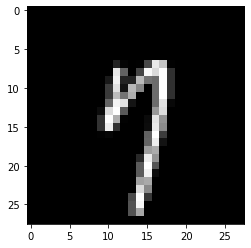

In [28]:
plt.imshow(x_test[689],'gray')
plt.show()

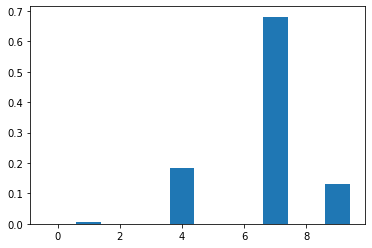

In [29]:
plt.bar(list(range(0,10)),res[0])
plt.show()

In [30]:
# img_index = 0-999
def test_img_pred(img_idx):
    test_img = x_test[img_idx].reshape(1,28,28,1)
    pred = m1.predict(test_img)  # 2D numpy array
    res = np.argmax(pred[0])
    
    plt.subplot(1,2,1)
    plt.imshow(x_test[img_idx],'gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f'Test Image {img_idx}')
    plt.xlabel(f'Actual Val: {y_test[img_idx]}\nPrediced val {res}')
    
    plt.subplot(1,2,2)
    plt.bar(list(range(10)),pred[0],color='orange')
    plt.xticks(np.arange(10))
    plt.title('Prediction Probability')
    plt.show()
    

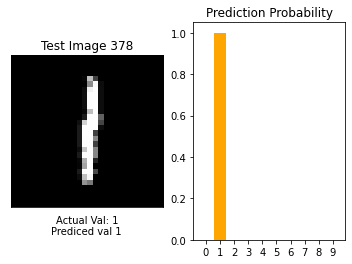

In [31]:
test_img_pred(378)

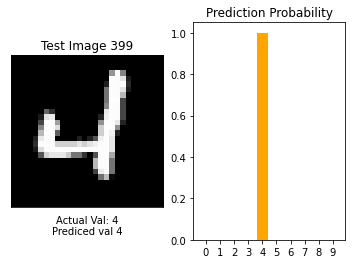

In [32]:
test_img_pred(399)

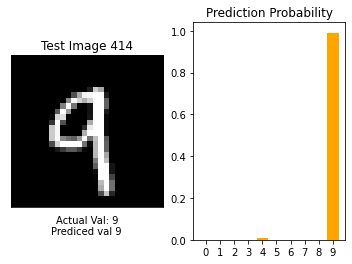

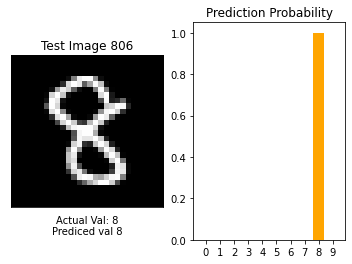

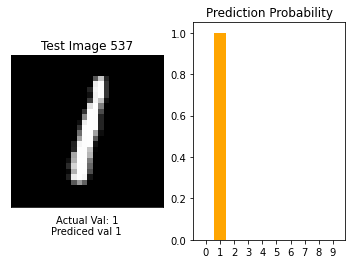

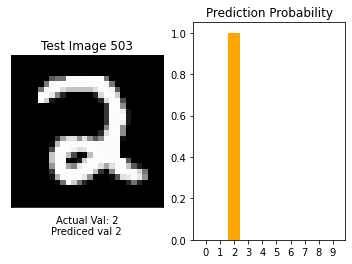

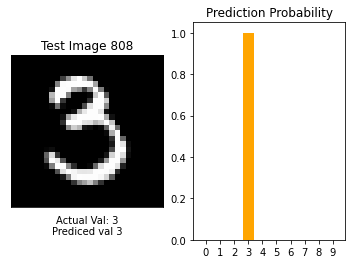

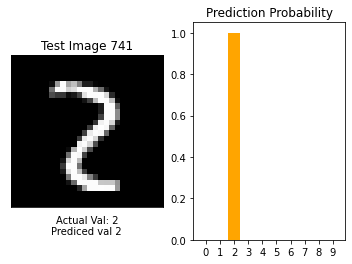

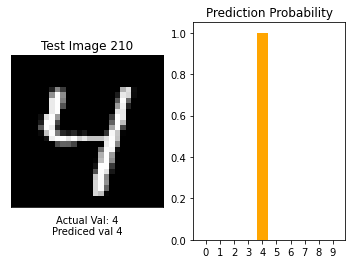

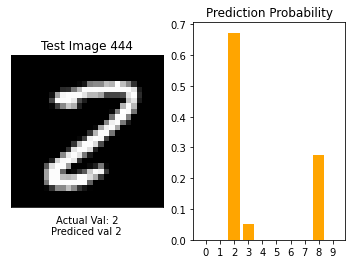

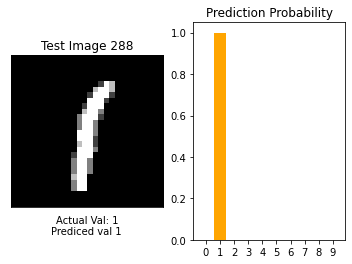

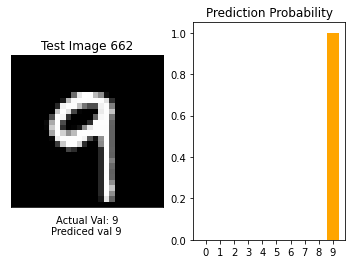

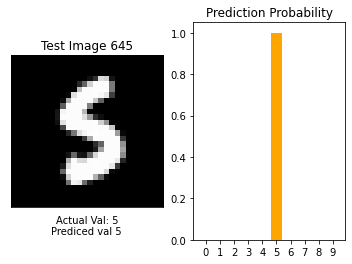

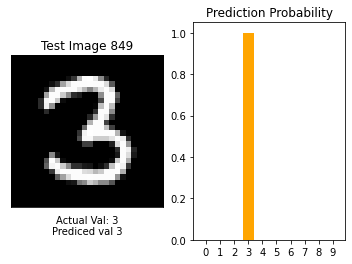

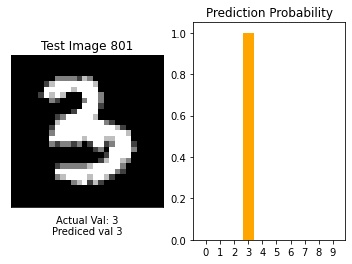

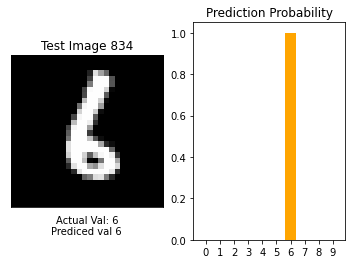

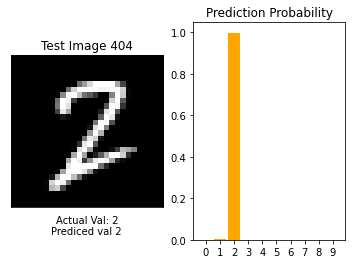

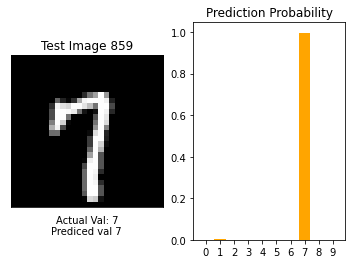

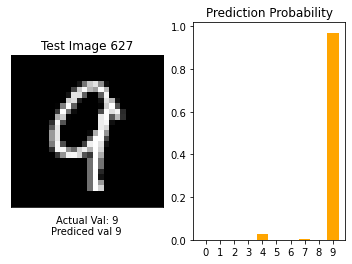

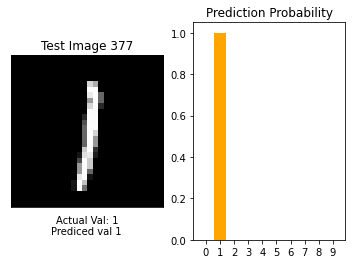

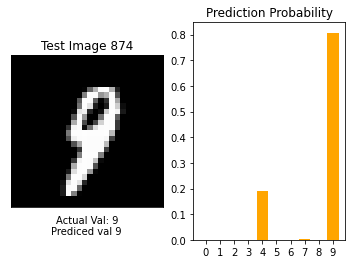

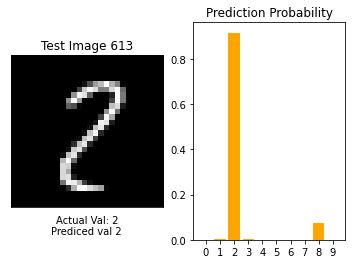

In [33]:
for i in np.random.randint(100,900,20):
    test_img_pred(i)

### Practice datasets

In [34]:
#### CIFAR10

# Different categories
# airplane
# automobile
# bird
# cat
# deer
# dog
# frog
# horse
# ship
# truck

In [38]:
from tensorflow.keras.datasets import cifar10

In [39]:
(x_tr2,y_tr2),(x_te2,y_te2) = cifar10.load_data()
print(x_tr2.shape) # 60000 images with 28*28 as (height and width)
print(x_te2.shape)
print(y_tr2.shape)
print(y_te2.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


/opt/anaconda3/envs/tf/lib/python3.7/site-packages/matplotlib/text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


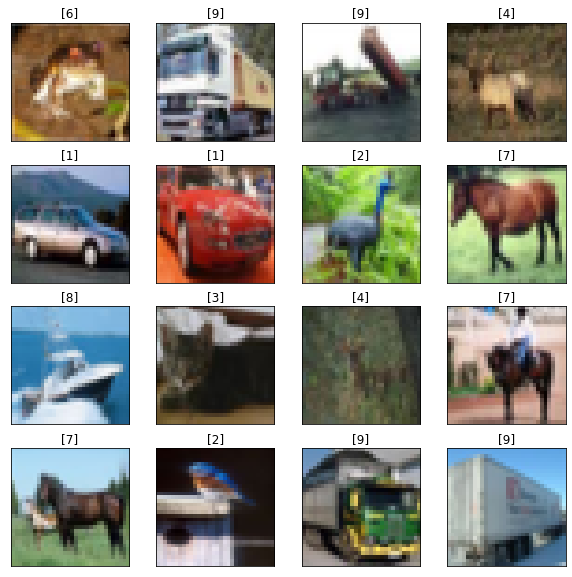

In [40]:
plt.figure(figsize=(10,10))
for i in range(16):  # i=0,1,2,...,15
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tr2[i])
    plt.title(y_tr2[i])
plt.show()

In [41]:
from tensorflow.keras.datasets import fashion_mnist, cifar10

In [42]:
(x_tr1,y_tr1),(x_te1,y_te1) = fashion_mnist.load_data()
print(x_tr1.shape) # 60000 images with 28*28 as (height and width)
print(x_te1.shape)
print(y_tr1.shape)
print(y_te1.shape)

4423680/4422102 [==============================] - 1s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


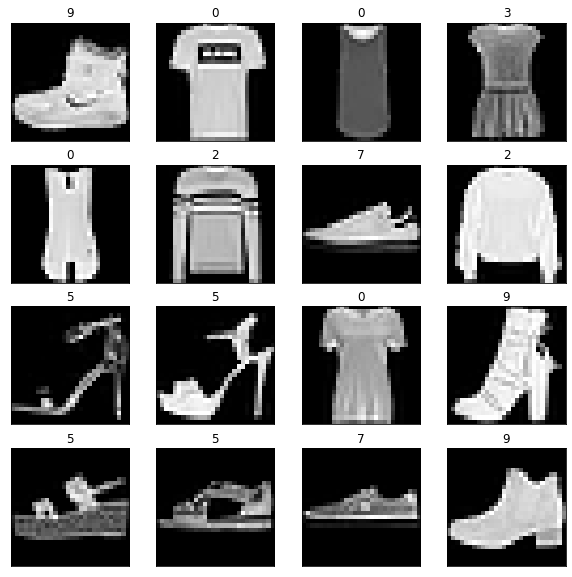

In [43]:
plt.figure(figsize=(10,10))
for i in range(16):  # i=0,1,2,...,15
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_tr1[i],'gray')
    plt.title(y_tr1[i])
plt.show()

In [ ]:
#### Fashion MNIST

# Different categories
# 0 T-shirt/top
# 1 Trouser
# 2 Pullover
# 3 Dress
# 4 Coat
# 5 Sandal
# 6 Shirt
# 7 Sneaker
# 8 Bag
# 9 Ankle boot
